In [18]:
from instruments.E5063A_driver import *
from instruments.Agilent11713C_driver import *
from instruments.SIM928_driver import *
from instruments.E8257D_driver import *
import numpy as np
import matplotlib.pyplot as plt
import measurements.powersweep_twotone as powersweep_twotone

In [25]:
qubitname = 'olivier_sample'


na_address = "TCPIP0::169.254.101.105::inst0::INSTR"
att_address = "TCPIP0::169.254.101.101::inst0::INSTR"
RFsource_address = 'TCPIP0::169.254.101.104::inst0::INSTR'
Voltage_Source_address = "GPIB0::2::INSTR"
Voltage_Source_port = 8

voltage_source_state = True

average_points = 999
center_frequency = 7340.4e6
span_frequency = 50e6
npoints = 251
if_freq = 1e3
average_time = 1

RFSource_amplitude_initial = 18
RFSource_amplitude_final = -20
RFSource_amplitude_step = -5

RFSource_frequency_initial = 6200e6
RFSource_frequency_final = 6350e6
RFSource_frequency_step = 10e6


RFSource_amplitude = 18
passive_RF_attenuation = 26
passive_na_attenuation = 0
na_amplitude = 0

attenuator_attenuation = 34


Voltage_Source_voltage = -5
current_step_time = 0.1

Voltsource = SIM928_driver(Voltage_Source_address,Voltage_Source_port,step_time = current_step_time)
na = E5063A_driver(na_address)
att = Agilent11713C_driver(att_address)
RFsource = E8257D_driver(RFsource_address)

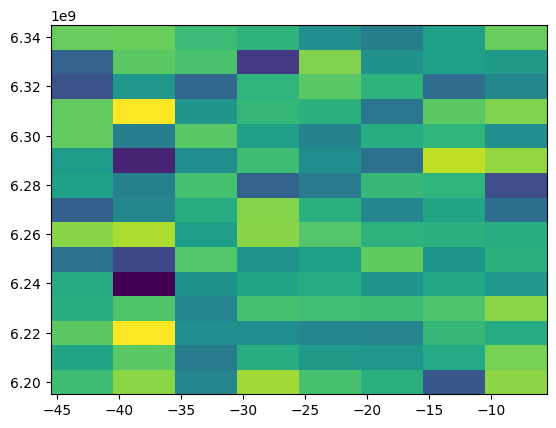

'olivier_sample_20230825_1611_powersweep_twotone_from_6200_to_6350_cfreq_7340.npz'

In [26]:
powersweep_twotone.measure(na, att,RFsource,Voltsource,Voltage_Source_voltage,voltage_source_state,attenuator_attenuation,na_amplitude,average_time, center_frequency,span_frequency, average_points, npoints, if_freq, RFSource_frequency_initial, RFSource_frequency_final, RFSource_frequency_step,RFSource_amplitude_initial,RFSource_amplitude_final,RFSource_amplitude_step,passive_RF_attenuation,qubitname)

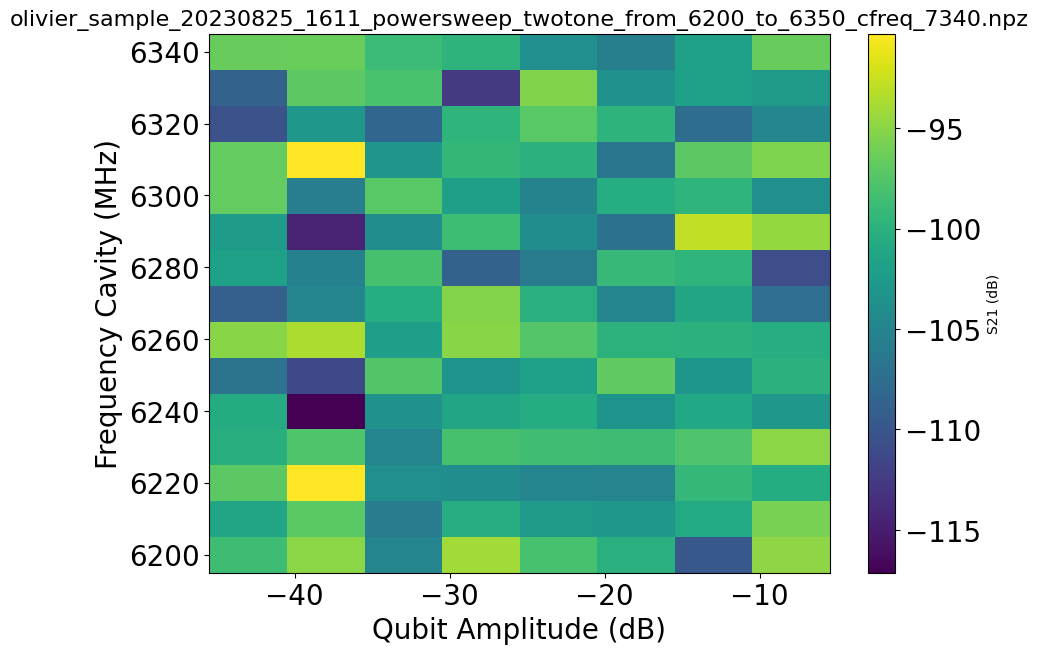

In [28]:
powersweep_twotone.plot('olivier_sample_20230825_1611_powersweep_twotone_from_6200_to_6350_cfreq_7340.npz')

In [31]:
data = np.load('olivier_sample_20230825_1611_powersweep_twotone_from_6200_to_6350_cfreq_7340.npz')
print(data['header'])

    data = np.load('olivier_sample_20230825_1611_powersweep_twotone_from_6200_to_6350_cfreq_7340.npz')
    qamps = data['qubit_amplitudes']
    qfreqs = data['qubit_freqs']
    mags = np.abs(data['Z'])
    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    plt.pcolor(qamps,qfreqs*1e-6,20*np.log10(mags))
    cbar=plt.colorbar(label='S21 (dB)')
    cbar.ax.tick_params(labelsize=20)
    ax.tick_params(labelsize=20)
    ax.set_ylabel('Qubit Amplitude (dB)',fontsize=20)
    ax.set_xlabel('Frequency (MHz)',fontsize=20)
    ax.set_title('olivier_sample_20230825_1611_powersweep_twotone_from_6200_to_6350_cfreq_7340',fontsize=16)
    plt.show()


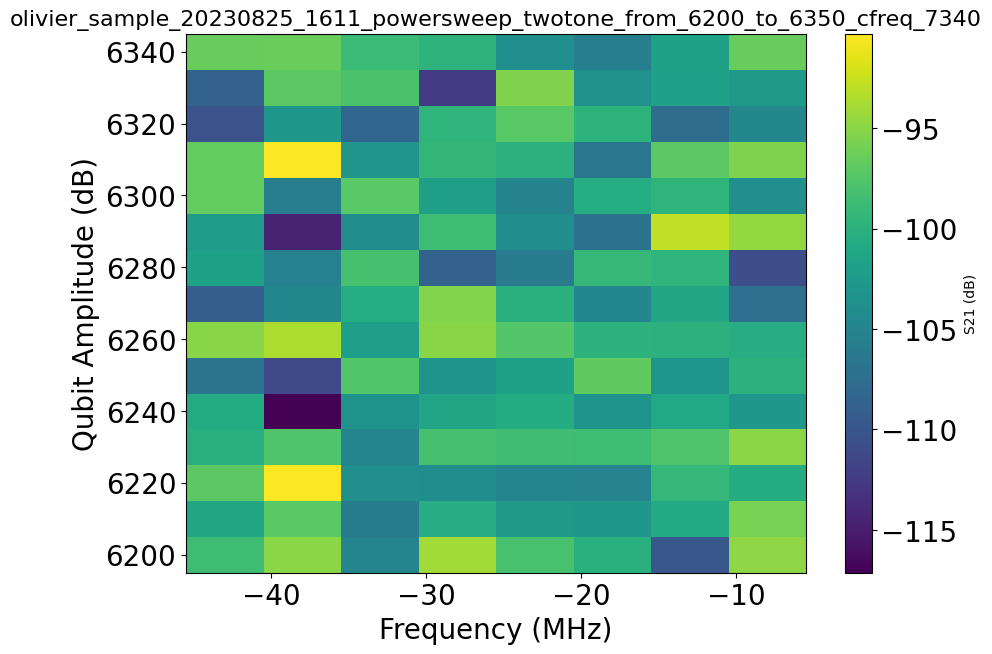

In [32]:
data = np.load('olivier_sample_20230825_1611_powersweep_twotone_from_6200_to_6350_cfreq_7340.npz')
qamps = data['qubit_amplitudes']
qfreqs = data['qubit_freqs']
mags = np.abs(data['Z'])
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
plt.pcolor(qamps,qfreqs*1e-6,20*np.log10(mags))
cbar=plt.colorbar(label='S21 (dB)')
cbar.ax.tick_params(labelsize=20)
ax.tick_params(labelsize=20)
ax.set_ylabel('Qubit Amplitude (dB)',fontsize=20)
ax.set_xlabel('Frequency (MHz)',fontsize=20)
ax.set_title('olivier_sample_20230825_1611_powersweep_twotone_from_6200_to_6350_cfreq_7340',fontsize=16)
plt.show()